# Echograms

Sample Simrad EK60 data is courtesy of British Antarctic Survey https://github.com/bas-acoustics/krill-ball


In [7]:
using SimradEK60
using SimradEK60TestData
using EchogramPyPlot
using EchogramColorSchemes
using ColorSchemes
using PyPlot
using LaTeXStrings

Simrad EK60 echo sounder data is available in RAW file format and must be converted to volume backscater ($S_v$). Here we use 120 kHz data. 

In [8]:
filename = EK60_SAMPLE
ps = SimradEK60.load(filename) # All pings
ps120 = [p for p in ps if p.frequency == 120000] # 120 kHz pings
Sv120 = Sv(ps120) # Volume backscatter
r120 = R(ps120) # Range / depth

# Crop
x = 340
d = 1500
Sv120 = Sv120[1:d,x:end]
r120 = r120[1:d,x:end]

r120 = maximum(r120)

277.07672f0

## Echogram using a traditional fisheries acoustic colour map

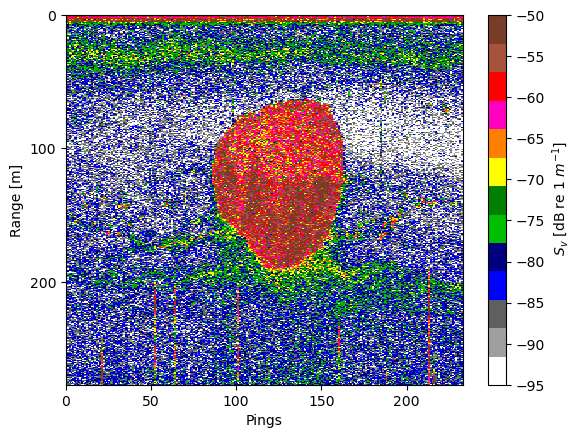

In [9]:
c = addwhite(EchogramColorSchemes.EK500).colors
echogram(Sv120, vmin=-95, vmax=-50, cmap=ColorMap("EK500",c,length(c)), range=maximum(r120))
cbar = PyPlot.colorbar()
cbar.set_label(L" $S_v$ [dB re 1 $m^{-1}$] ")
xlabel("Pings")
ylabel("Range [m]");

## Echogram using a sequential, perceptually uniform colour map

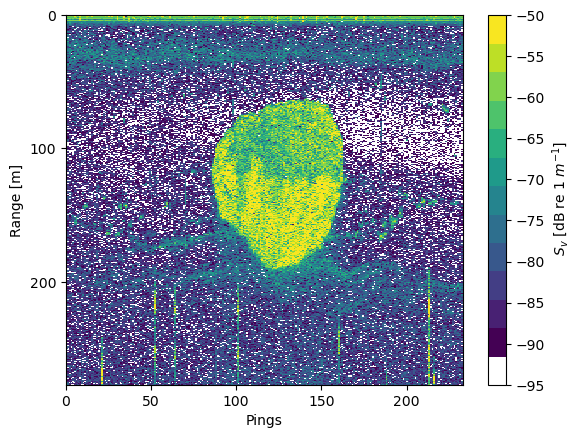

In [10]:
viridis12 = ColorScheme(ColorSchemes.viridis.colors[1:23:end])
c = addwhite(viridis12).colors
echogram(Sv120, vmin=-95, vmax=-50, cmap=ColorMap("EK500",c,length(c)), range=maximum(r120))
cbar = PyPlot.colorbar()
cbar.set_label(L" $S_v$ [dB re 1 $m^{-1}$] ")
xlabel("Pings")
ylabel("Range [m]");